In [ ]:
pip install tensorflow pandas scikit-learn

          CTR Rate         Hour
count  1000.000000  1000.000000
mean      8.817300    12.571000
std       4.640567     2.921557
min       4.000000     8.000000
25%       6.100000    10.000000
50%       7.300000    13.000000
75%       8.800000    15.000000
max      22.000000    17.000000


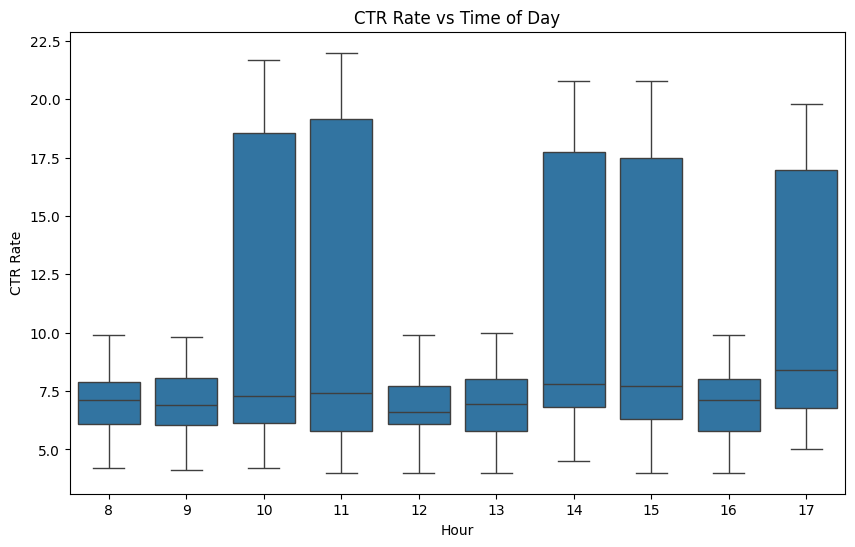

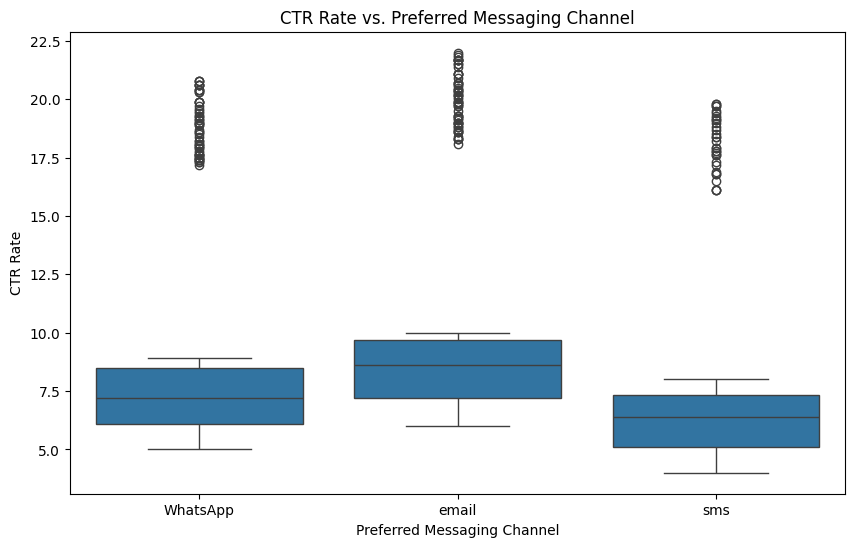

<ipython-input-2-1493d00b83b3>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type of CTA', y='CTR Rate', data=data, palette='viridis')


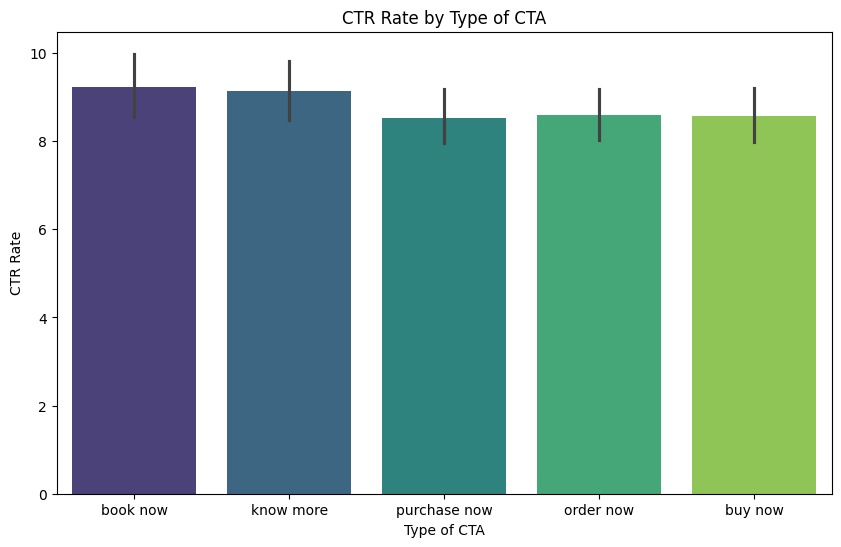

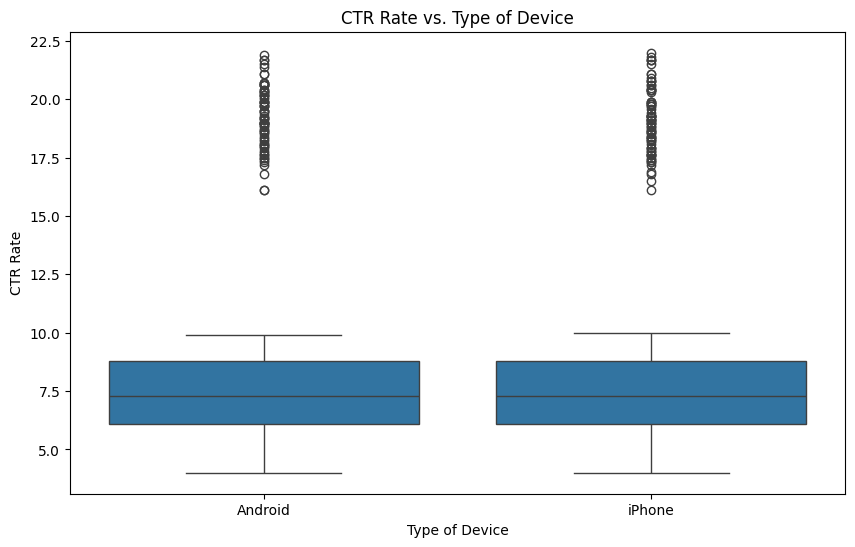

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('/content/Dataset.csv')
df=pd.DataFrame(data)

data['Hour']=pd.to_datetime(data['Time of Checking Messages'], format='%I %p').dt.hour
print(data.describe())

plt.figure(figsize=(10,6))
sns.boxplot(x='Hour',y='CTR Rate',data=data)
plt.title('CTR Rate vs Time of Day')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Preferred Messaging Channel', y='CTR Rate', data=data)
plt.title('CTR Rate vs. Preferred Messaging Channel')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Type of CTA', y='CTR Rate', data=data, palette='viridis')
plt.title('CTR Rate by Type of CTA')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type of Device', y='CTR Rate', data=data)
plt.title('CTR Rate vs. Type of Device')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

encoder=OneHotEncoder(sparse_output=False)
encoded_features=encoder.fit_transform(data[['City','Preferred Messaging Channel','Type of Device','Type of CTA']])
features = np.concatenate([encoded_features,data[['Hour']].values],axis=1)
target=data['CTR Rate'].values

X_train,X_val,y_train,y_val=train_test_split(features,target,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model=models.Sequential()
model.add(layers.Dense(128, input_dim=X_train.shape[1],activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mae'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 7.5477 - mae: 7.5477 - val_loss: 3.2575 - val_mae: 3.2575
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7705 - mae: 2.7705 - val_loss: 2.9249 - val_mae: 2.9249
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5965 - mae: 2.5965 - val_loss: 2.8955 - val_mae: 2.8955
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6658 - mae: 2.6658 - val_loss: 2.9069 - val_mae: 2.9069
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6781 - mae: 2.6781 - val_loss: 2.8904 - val_mae: 2.8904
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6283 - mae: 2.6283 - val_loss: 2.9107 - val_mae: 2.9107
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2480 - mae: 2.2480 - val_loss: 2.9260 - val_mae: 2.9260
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6822 - mae: 2.6822 - val_loss: 2.9316 - val_mae: 2.9316
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.459

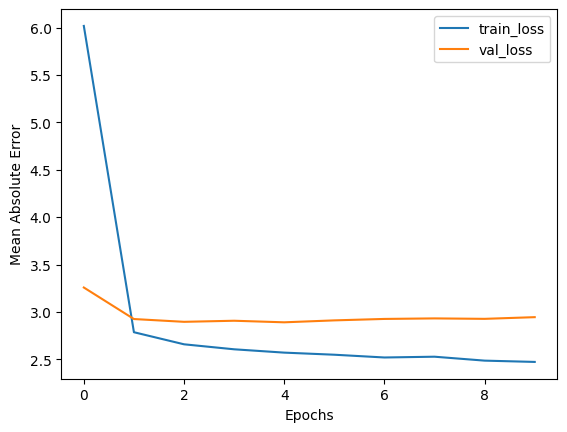

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=16,callbacks=[early_stopping])

plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f"Validation Mean Absolute Error: {val_mae}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0644 - mae: 3.0644 
Validation Mean Absolute Error: 2.8903679847717285


In [ ]:
# Predict CTR rates on validation data
predictions = model.predict(X_val)

# Print out actual vs predicted CTR rates
for i in range(len(y_val)):
    print(f"Actual CTR: {y_val[i]}, Predicted CTR: {predictions[i][0]}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Actual CTR: 19.9, Predicted CTR: 8.278158187866211
Actual CTR: 7.6, Predicted CTR: 6.598939418792725
Actual CTR: 8.3, Predicted CTR: 6.901553153991699
Actual CTR: 5.3, Predicted CTR: 7.286251544952393
Actual CTR: 5.1, Predicted CTR: 7.709218502044678
Actual CTR: 9.1, Predicted CTR: 8.724603652954102
Actual CTR: 18.6, Predicted CTR: 8.321725845336914
Actual CTR: 21.9, Predicted CTR: 7.88288688659668
Actual CTR: 5.7, Predicted CTR: 6.851020812988281
Actual CTR: 4.9, Predicted CTR: 6.518784046173096
Actual CTR: 7.9, Predicted CTR: 5.537278652191162
Actual CTR: 9.6, Predicted CTR: 8.016664505004883
Actual CTR: 6.3, Predicted CTR: 8.999279022216797
Actual CTR: 6.5, Predicted CTR: 6.003561973571777
Actual CTR: 5.5, Predicted CTR: 6.242031097412109
Actual CTR: 7.5, Predicted CTR: 7.286526203155518
Actual CTR: 8.9, Predicted CTR: 6.831539630889893
Actual CTR: 6.1, Predicted CTR: 5.3403496742248535
Actual CTR: 4.9, Predicted CTR: 6.7362847328186035
Actual C

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
7/7 ━━━━━━━━

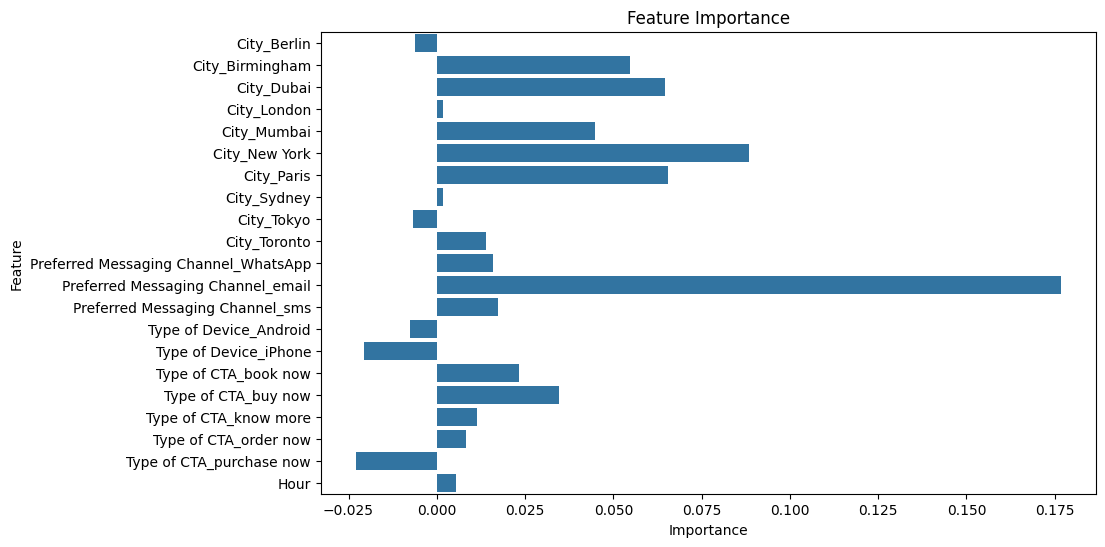

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate the permutation importance on the validation set
result = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')

# Get the importance scores
importance_scores = result.importances_mean

# Get feature names after encoding (for one-hot encoded columns)
encoded_feature_names = encoder.get_feature_names_out(['City', 'Preferred Messaging Channel', 'Type of Device', 'Type of CTA'])
all_feature_names = list(encoded_feature_names) + ['Hour']  # Add 'Hour' feature

# Ensure the length of feature names matches the length of importance scores
if len(all_feature_names) != len(importance_scores):
    print(f"Feature names length {len(all_feature_names)} doesn't match importance scores length {len(importance_scores)}")
else:
    # Display the feature importances
    for i, score in enumerate(importance_scores):
        print(f"Feature: {all_feature_names[i]}, Importance: {score}")

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance_scores, y=all_feature_names)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

In [ ]:
model.save('ctr_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('ctr_model.h5')

In [ ]:
from flask import Flask, request, jsonify
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the Flask app
app = Flask(__name__)

# Load the TensorFlow model
model = load_model('/content/ctr_model.h5')

# Dummy encoder and scaler for this example (fit these in your training environment and save/load them)
encoder = OneHotEncoder(sparse_output=False)
encoder.fit([['City', 'Preferred Messaging Channel', 'Type of Device', 'Type of CTA']])
scaler = StandardScaler()

# Preprocess the input data
def preprocess_input(data):
    # One-hot encode the categorical data
    encoded_features = encoder.transform([[data['City'], data['Preferred Messaging Channel'],
                                           data['Type of Device'], data['Type of CTA']]])

    # Add the hour feature
    hour_feature = np.array([[data['Hour']]])

    # Concatenate the features
    input_features = np.concatenate([encoded_features, hour_feature], axis=1)

    # Scale the features
    input_scaled = scaler.transform(input_features)

    return input_scaled

# Define a route for prediction
@app.route('/predict_ctr', methods=['POST'])
def predict_ctr():
    data = request.json  # Get JSON input from the request

    # Preprocess the input data
    processed_input = preprocess_input(data)

    # Make prediction using the model
    prediction = model.predict(processed_input)

    # Return the predicted CTR
    return jsonify({'predicted_ctr': float(prediction[0][0])})

# Run the Flask app
if __name__ == '__main__':
  app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
